<a href="https://colab.research.google.com/github/SushilKokare/DeepLearningStudy/blob/main/7_pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Adding Densly connected classifier on top of the convulational base

In [2]:
from keras.models import Sequential
from keras import layers as lrs
from keras.applications import VGG16

In [3]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
model = Sequential()
model.add(conv_base)
model.add(lrs.Flatten())
model.add(lrs.Dense(256,activation='relu'))
# model.add(lrs.Dropout(0.5))
model.add(lrs.Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
print('Nummber of trainable weights before freezing the conv_base ',len(model.trainable_weights))

Nummber of trainable weights before freezing the conv_base  30


In [7]:
conv_base.trainable = False

In [8]:
print('Nummber of trainable weights after freezing the conv_base ',len(model.trainable_weights))

Nummber of trainable weights after freezing the conv_base  4


In [9]:
import matplotlib.pyplot as plt

def plots_with_val(history):
  val_acc = history.history['val_acc']
  acc = history.history['acc']

  val_loss = history.history['val_loss']
  loss = history.history['loss']

  epochs = history.epoch

  fig,axs = plt.subplots(1,2, figsize=(10, 3))
  axs[0].plot(epochs,val_acc,'r--',label='Val Acc')
  axs[0].plot(epochs,acc,'b',label='Train Acc')
  axs[0].legend()
  axs[0].set_xlabel('Epochs')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_title('Accuracy')


  axs[1].plot(epochs,val_loss,'r--',label='Val Loss')
  axs[1].plot(epochs,loss,'b',label='Train Loss')
  axs[1].legend()
  axs[1].set_xlabel('Epochs')
  axs[1].set_ylabel('Loss')
  axs[1].set_title('Loss')

  plt.show()

### Training the model end to end with a frozen conv base

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [11]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Study Book/cats_and_dogs_small/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Study Book/cats_and_dogs_small/test'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Study Book/cats_and_dogs_small/validation'

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [14]:
validation_gen = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [15]:
model.compile(optimizer=optimizers.RMSprop(2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_gen,
    validation_steps=50
)

<ipython-input-16-ad141dc79e1a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 628s 6s/step - loss: 0.6388 - acc: 0.6315 - val_loss: 0.5413 - val_acc: 0.7110
Epoch 2/30
100/100 [==============================] - 25s 253ms/step - loss: 0.5538 - acc: 0.7330 - val_loss: 0.4363 - val_acc: 0.8280
Epoch 3/30
100/100 [==============================] - 26s 256ms/step - loss: 0.5177 - acc: 0.7545 - val_loss: 0.4027 - val_acc: 0.8330
Epoch 4/30
100/100 [==============================] - 25s 254ms/step - loss: 0.4906 - acc: 0.7515 - val_loss: 0.3778 - val_acc: 0.8280
Epoch 5/30
100/100 [==============================] - 26s 255ms/step - loss: 0.4738 - acc: 0.7765 - val_loss: 0.3665 - val_acc: 0.8320
Epoch 6/30
100/100 [==============================] - 25s 251ms/step - loss: 0.4572 - acc: 0.7880 - val_loss: 0.3583 - val_acc: 0.8390
Epoch 7/30
100/100 [==============================] - 25s 254ms/step - loss: 0.4511 - acc: 0.7865 - val_loss: 0.3534 - val_acc: 0.8420
Epoch 8/30
100/100 [==============================] - 25s

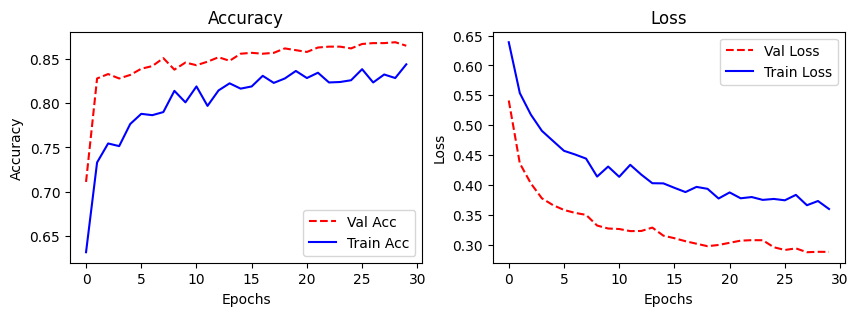

In [17]:
plots_with_val(history)